# 시계열 데이터 (Time Series) 분석
Window: 관리자 권한으로 anaconda prompt 실행 <br>
Visual C++ build 설치 <br>
- conda install -c anaconda pandas-datareader
- conda install -c conda-forge pystan
- conda install -c conda-forge fbprophet
- conda install -c plotly plotly

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pinkwink_web = pd.read_csv('./source/PinkWink Web Traffic.csv',
                            encoding='utf-8',
                            thousands=',',
                            names = ['date','hit'],
                            index_col = 0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


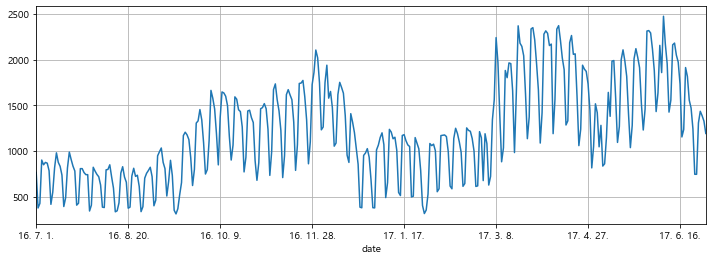

In [6]:
pinkwink_web.hit.plot(figsize = (12,4), grid = True)
plt.show()

# Regression <br>
fp1 = np.polyfit( x축, y축, 차수): 데이터의 다항식 근사, 결과는 계수 튜플 <br>
f1 = np.poly1d( fp1(np.polyfit의 결과) ): 계수 튜플을 실제 함수로. y = f(x) 에서 f만 구현 <br>
plt.plot()에서 plot(x축,f1(x축)) 으로 실제 f 에 x를 넣어서 y를 얻어야 함 <br>

In [7]:
len(pinkwink_web)

365

In [12]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].to_numpy()

fx = np.linspace(0, time[-1], 1000)

- Mean Squared Error <br>
오차 제곱의 평균

In [13]:
def mse(f,x,y):
    return np.sqrt(np.mean( (f(x) - y)**2 ))
    # f(x): 예측값
    # y: 실제값

In [14]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
mse(f1, time, traffic)

430.85973081109637

In [17]:
# 2차
fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)
# 3차
fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp)
# 15차
fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp1)

## 과적합
- 1,2,3차의 mse가 큰 차이가 없으므로 1차로 선형회귀해도 문제 없을 것이다.

In [16]:
for n in range(1, 15 + 1):
    fnp = np.polyfit(time, traffic, n)
    fn = np.poly1d(fnp)
    print(f'{n}차일 경우 MSE: {mse(fn, time, traffic)}')

1차일 경우 MSE: 430.85973081109637
2차일 경우 MSE: 430.62841018946943
3차일 경우 MSE: 429.53280466762925
4차일 경우 MSE: 423.5828148341961
5차일 경우 MSE: 389.8483612021822
6차일 경우 MSE: 385.40591940643003
7차일 경우 MSE: 376.08375272436064
8차일 경우 MSE: 361.8379209111359
9차일 경우 MSE: 347.75707091496054
10차일 경우 MSE: 346.3313358088324
11차일 경우 MSE: 341.38530813982777
12차일 경우 MSE: 332.4400772233719
13차일 경우 MSE: 330.7222438719264
14차일 경우 MSE: 330.5615448217537
15차일 경우 MSE: 330.4777305026131


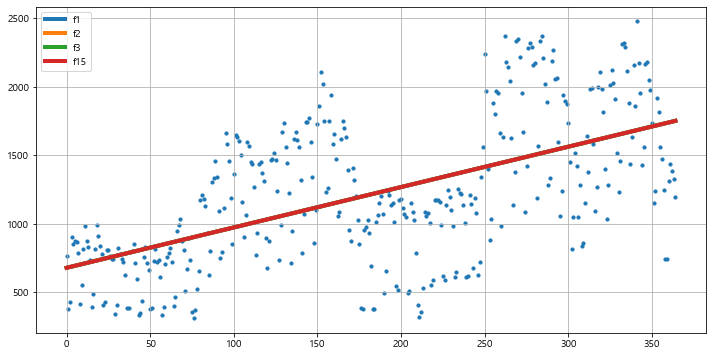

In [18]:
plt.figure( figsize = (12,6) )
plt.scatter(time, traffic, s = 10)

plt.plot(fx, f1(fx), lw = 4 , label = 'f1')
plt.plot(fx, f2(fx), lw = 4 , label = 'f2')
plt.plot(fx, f3(fx), lw = 4 , label = 'f3')
plt.plot(fx, f15(fx), lw = 4 , label = 'f15')

plt.grid(True)
plt.legend(loc=2)
plt.show()

## Prophet 모듈

In [22]:
from fbprophet import Prophet
from datetime import datetime

In [23]:
pinkwink_web.head(2)

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0


In [34]:
df = pd.DataFrame({'ds':pinkwink_web.index,
                    'y':pinkwink_web.hit})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']
df.head(2)

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0


In [35]:
# Prophet 모델의 하이퍼 파라미터 설정 
model = Prophet(yearly_seasonality=True ,daily_seasonality=True)
# 모델 학습
model.fit(df)

In [36]:
future = model.make_future_dataframe(periods=60)
future.tail(3)

,ds
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [41]:
# 예측
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,695.650607,1126.519062
421,2017-08-26,496.917939,288.550947,710.807482
422,2017-08-27,629.458439,414.958618,848.909258
423,2017-08-28,1181.938386,983.780860,1396.955349
424,2017-08-29,1217.864960,1001.364838,1423.394283


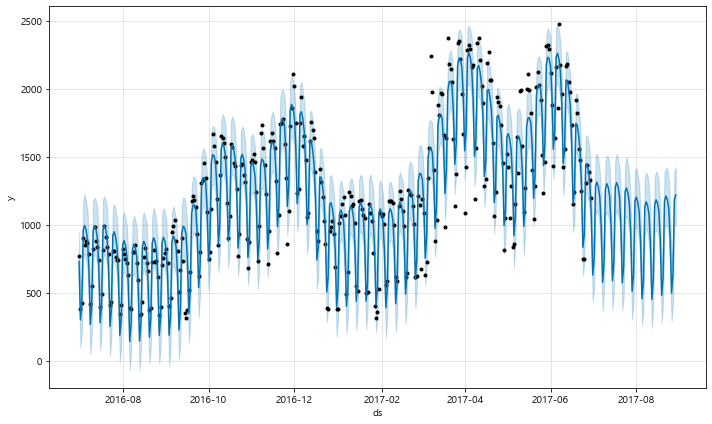

In [42]:
# ;를 사용하지 않으면 같은 그래프가 두 번 그려짐
model.plot(forecast);

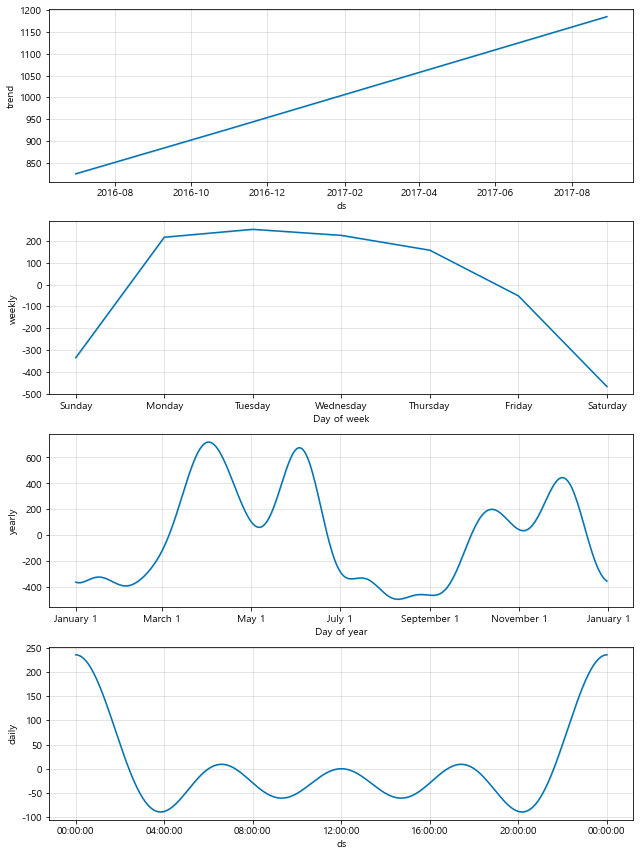

In [43]:
model.plot_components(forecast);